Guide: https://www.datacamp.com/tutorial/decision-tree-classification-python
Docs: https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

pima = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/diabetes.csv')
pima.head()
# We will see that this data will need preprocessing as some insulin, skin thickness and BMIs are 0, which is impossible

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Create a list of column names for the independent variables (features)
feature_cols = ['Pregnancies',
                'Glucose',
                'BloodPressure',
                'SkinThickness',
                'Insulin',
                'BMI',
                'DiabetesPedigreeFunction',
                'Age']

X = pima[feature_cols]
y = pima.Outcome # Can also use pima['Outcome']

In [3]:
# Split dataset into two - one part for training and one part for testing
# The function gives four returns, which we put on the left of the equals in the order it returns them, seperated by commas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # We set random_state=1 so we can reuse it later

# Set up the classification - for now don't pass it any arguments (no maximum node depth, and defaults using Gini index)
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf = clf.fit(X_train, y_train)

# Check how well the classifier fits the test data
y_pred = clf.predict(X_test)

Accuracy:  0.6883116883116883


Text(0.5, 1.0, 'Confusion Matrix')

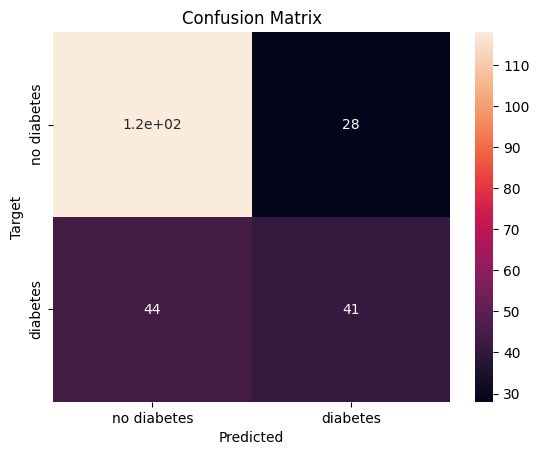

In [7]:
# Plot to see how good at predicting the classifier is by comparing the predicted values to the test values
import matplotlib.pyplot as plt
import seaborn as sns

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Confusion matrix with annotations and labels
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,
            xticklabels = ['no diabetes', 'diabetes'],
            yticklabels = ['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion Matrix')

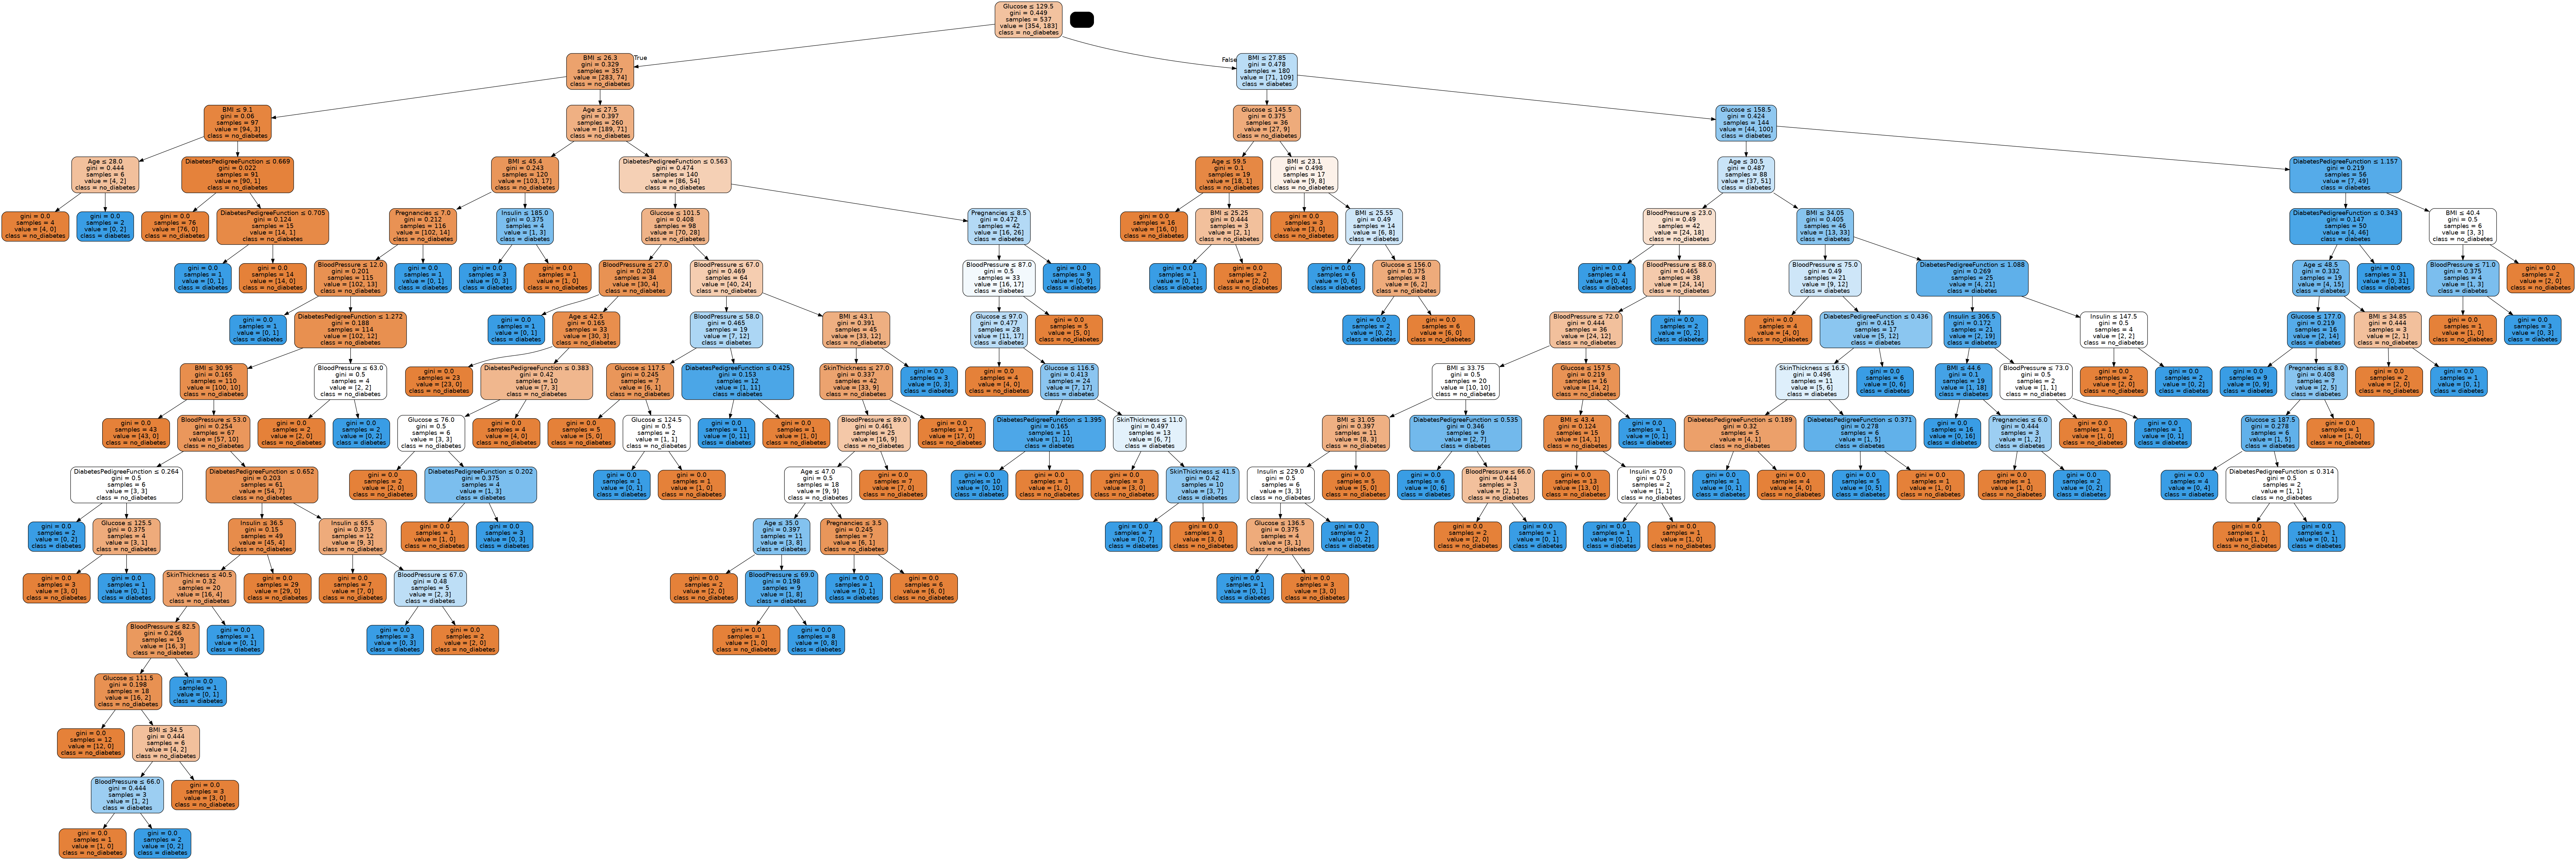

In [8]:
# Create a display for the decision tree using graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['no_diabetes', 'diabetes']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Accuracy:  0.7705627705627706


Text(0.5, 1.0, 'Confusion Matrix')

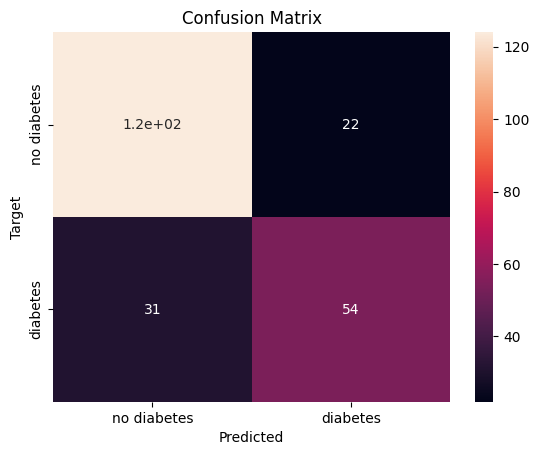

In [10]:
# There are two ways to improve the decision tree (see guide)
# Gini index
# Information gain (entropy): When we choose a mode to split on, we want to choose the node to minimise entropy - gets us closer to getting an accurate outcome

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

# Confusion matrix with annotations and labels
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,
            xticklabels = ['no diabetes', 'diabetes'],
            yticklabels = ['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion Matrix')

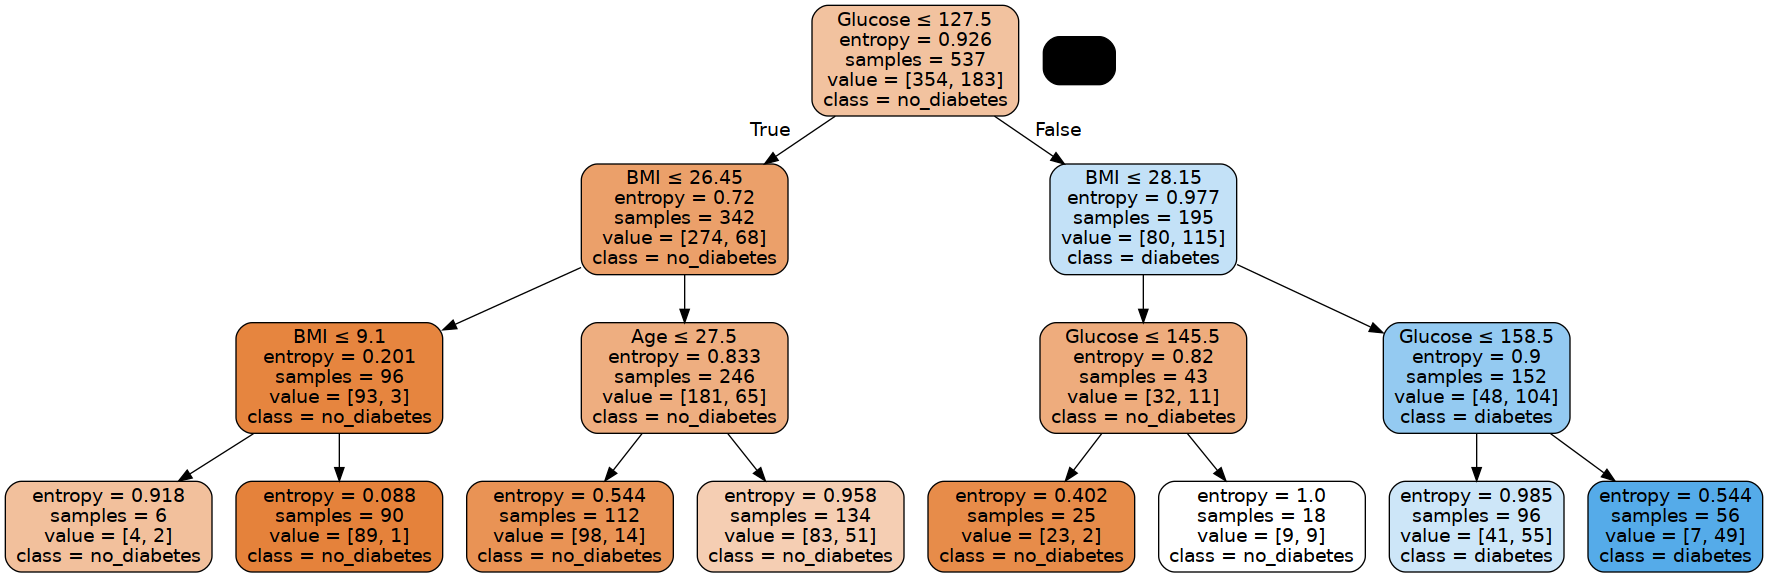

In [11]:
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['no_diabetes', 'diabetes']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Pruning the decision tree